# Knife crime EDA

Exploritory data analysis of a dataset that covers knife crime in England and Wales.

There is absolutely no information given on this file and so I will have to figure out everything for myself.

Hopefully this is a good exercise in data exploration and understanding.

An xls version can be found here:

https://www.kaggle.com/iainagar/knife-crime-england-and-wales

In [19]:
# import the required modules

import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot

# set the graph style

sns.set_theme(style="darkgrid")

In [2]:
# import the file

df = pd.read_csv('knifecrime.csv', header=1)

df.head()

,QtrNum,Force Name,Region,Financial Year,Financial Quarter,Population,Knife enabled,Violence with Injury,Homicide and serious injury,Knife Crime,RateKE,RateVWI,RateKC,ZScoreKE,ZScoreVWI,ZScoreKC
0,41,Metropolitan Police,London,2018/19,Q1,8778.491,2127,1688,42,3857,2.422968,1.922882,4.393694,5.373696,4.140609,5.180444
1,39,Metropolitan Police,London,2017/18,Q3,8778.491,2229,1558,35,3822,2.539161,1.774793,4.353823,5.677591,3.678527,5.119881
2,38,Metropolitan Police,London,2017/18,Q2,8778.491,2048,1714,35,3797,2.332975,1.952500,4.325345,5.138327,4.233025,5.076622
3,13,Metropolitan Police,London,2011/12,Q1,8778.491,2495,1235,31,3761,2.842174,1.406848,4.284335,6.470099,2.530433,5.014329
4,12,Metropolitan Police,London,2010/11,Q4,8778.491,2471,1207,28,3706,2.814835,1.374952,4.221682,6.398595,2.430908,4.919160


As with every new dataset we must first check for any null values and fill them to alleviate any problems further down the line.

In [57]:
df.isnull().sum()

Date                           0
Force Name                     0
Region                         0
Population                     0
Knife enabled                  0
Violence with Injury           0
Homicide and serious injury    0
Knife Crime                    0
RateKE                         0
RateVWI                        0
RateKC                         0
ZScoreKE                       0
ZScoreVWI                      0
ZScoreKC                       0
dtype: int64

# QtrNum

Looking at each column individually:

QtrNum is likely to be quarter number. We see that the top row has a QtrNum of 41, two higher than the row below with 39. Then if we look at the year and financial quarter, the first row is indeed two quarters later. This pattern then follows for the 3 rows below so it's safe to assume that we're correct with our hypothesis.

This one colum nicely sums up the two columns 'Financial year' and 'Financial Quarter' but has the drawback of being ambiguous. It would be clearer but still concise to give a single column with the starting date of the quarter.

Counting back we find that the first quarter is Q1 of 2008/09 qhich corresponds to 04/2008.

In [3]:
# Define the function that will change the QtrNumber to an actual date

def to_date(number):
    number = int(number) -1
    
    year = 2008 + math.floor(number/4)
    
    month = ((3 + (number*3))%12)+1
    
    start = ''
    
    if month < 10:
        start = '0'
    
    return start + str(month) + '/' + str(year)

# Apply the function

df['QtrNum'] = df['QtrNum'].apply(to_date)

df.head()

,QtrNum,Force Name,Region,Financial Year,Financial Quarter,Population,Knife enabled,Violence with Injury,Homicide and serious injury,Knife Crime,RateKE,RateVWI,RateKC,ZScoreKE,ZScoreVWI,ZScoreKC
0,04/2018,Metropolitan Police,London,2018/19,Q1,8778.491,2127,1688,42,3857,2.422968,1.922882,4.393694,5.373696,4.140609,5.180444
1,10/2017,Metropolitan Police,London,2017/18,Q3,8778.491,2229,1558,35,3822,2.539161,1.774793,4.353823,5.677591,3.678527,5.119881
2,07/2017,Metropolitan Police,London,2017/18,Q2,8778.491,2048,1714,35,3797,2.332975,1.952500,4.325345,5.138327,4.233025,5.076622
3,04/2011,Metropolitan Police,London,2011/12,Q1,8778.491,2495,1235,31,3761,2.842174,1.406848,4.284335,6.470099,2.530433,5.014329
4,01/2010,Metropolitan Police,London,2010/11,Q4,8778.491,2471,1207,28,3706,2.814835,1.374952,4.221682,6.398595,2.430908,4.919160


Now we can rename the column and drop the redundant columns.

In [4]:
# Rename QtrNum

df = df.rename(columns={'QtrNum':'Date'})

# Drop 'Financial Year' and 'Financial Quarter'

df = df.drop(columns=['Financial Year', 'Financial Quarter'])

df.head()

,Date,Force Name,Region,Population,Knife enabled,Violence with Injury,Homicide and serious injury,Knife Crime,RateKE,RateVWI,RateKC,ZScoreKE,ZScoreVWI,ZScoreKC
0,04/2018,Metropolitan Police,London,8778.491,2127,1688,42,3857,2.422968,1.922882,4.393694,5.373696,4.140609,5.180444
1,10/2017,Metropolitan Police,London,8778.491,2229,1558,35,3822,2.539161,1.774793,4.353823,5.677591,3.678527,5.119881
2,07/2017,Metropolitan Police,London,8778.491,2048,1714,35,3797,2.332975,1.952500,4.325345,5.138327,4.233025,5.076622
3,04/2011,Metropolitan Police,London,8778.491,2495,1235,31,3761,2.842174,1.406848,4.284335,6.470099,2.530433,5.014329
4,01/2010,Metropolitan Police,London,8778.491,2471,1207,28,3706,2.814835,1.374952,4.221682,6.398595,2.430908,4.919160


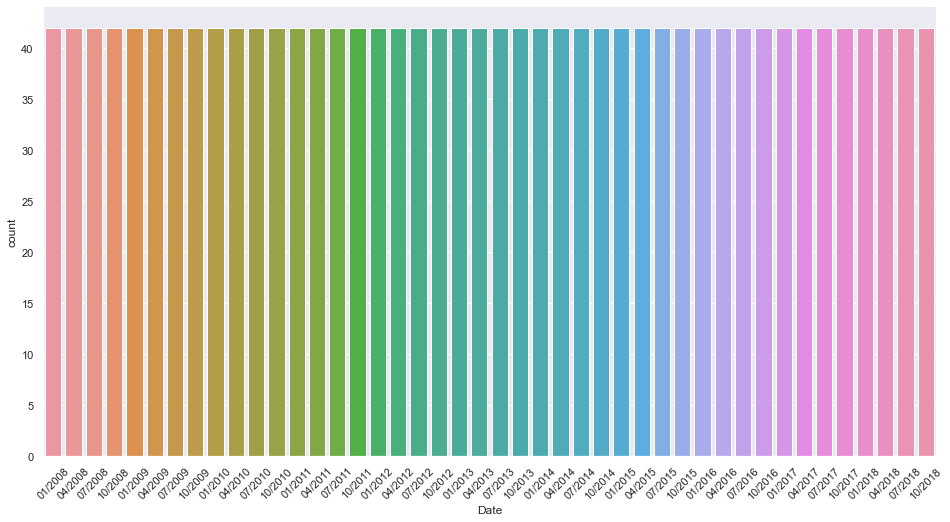

In [52]:
# set the plot size

a4_dims = (16, 8.27)

fig, ax = pyplot.subplots(figsize=a4_dims)

# creat a count plot with the values sorted by date

ax = sns.countplot(x='Date', data=df.sort_values(by=['Date'], key=lambda x: x.str[5:7].astype(int) + (x.str[0:2].astype(int)/10)))

ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



We find a very level count plot, indicating that the data has been hand picked for with respect to the dates for an even spread.

# Force Name

Force name seems pretty self explanatory but let's see what it offers by looking at the unique values.

In [58]:
df['Force Name'].unique()

array(['Metropolitan Police', 'Greater Manchester', 'West Midlands',
       'Bedfordshire', 'West Yorkshire', 'Merseyside', 'Nottinghamshire',
       'Cleveland', 'Lancashire', 'Northamptonshire', 'South Yorkshire',
       'Leicestershire', 'Humberside', 'Essex', 'Northumbria',
       'Cambridgeshire', 'Staffordshire', 'Avon and Somerset',
       'Thames Valley', 'Derbyshire', 'North Wales', 'Gloucestershire',
       'Warwickshire', 'Sussex', 'South Wales', 'Norfolk',
       'Hertfordshire', 'Kent', 'Wiltshire', 'West Mercia', 'Surrey',
       'Durham', 'Dyfed-Powys', 'Hampshire', 'Suffolk', 'Dorset',
       'Cheshire', 'North Yorkshire', 'Lincolnshire', 'Gwent', 'Cumbria',
       'Devon and Cornwall'], dtype=object)

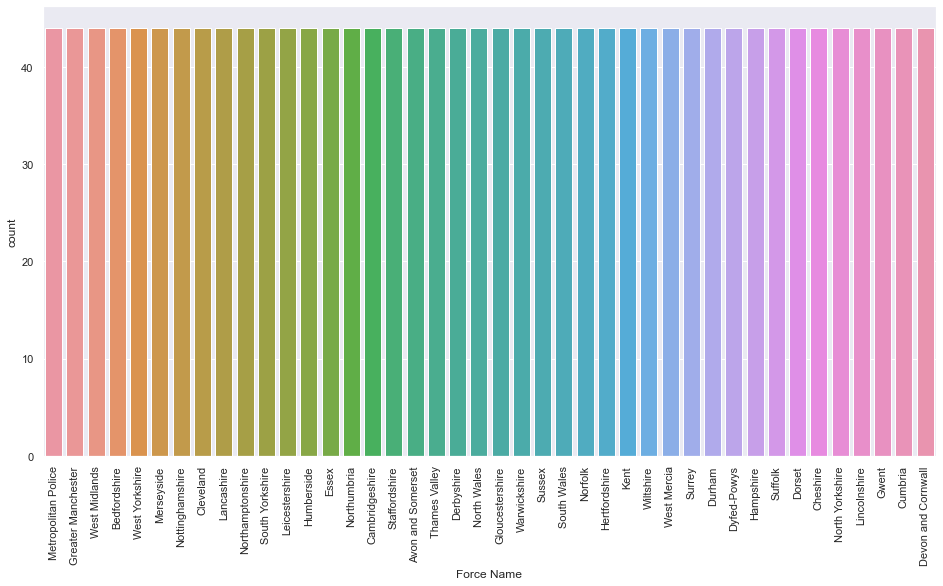

In [62]:
# set the plot size

a4_dims = (16, 8.27)

fig, ax = pyplot.subplots(figsize=a4_dims)

# creat a count plot with the values sorted by date

ax = sns.countplot(x='Force Name', data=df)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Again we see a very even spread of data. We must assume that each row has been carefully selected to accomodate for the date AND the force.